<center><b> Open Question </b></center>

## SWIR

In this model, during the epidemics, a node is allowed to change its status from Susceptible (S) to Weakened (W) or Infected (I), then to Removed (R).

The model is instantiated on a graph having a non-empty set of infected nodes.

At time t a node in the state I is selected randomly and the states of all neighbors are checked one by one. If the state of a neighbor is S then this state changes either i) to I with probability kappa or ii) to W with probability mu. If the state of a neighbor is W then the state W changes to I with probability nu. We repeat the above process for all nodes in state I and then changes to R for each associated node.

In [1]:
import pandas as pd
import csv
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import ndlib
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import ndlib.models.epidemics as ep
warnings.filterwarnings('ignore')
from cdlib import algorithms, viz, evaluation

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [37]:
g = nx.read_edgelist("Links.csv", delimiter=",", nodetype=int) #graph

In [21]:
model = ep.SWIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('kappa', 0.002) #treshold from S => I
cfg.add_model_parameter('mu', 0.03) #treshold from S => W
cfg.add_model_parameter('nu', 0.04) #treshold from W => I
cfg.add_model_parameter("fraction_infected", 0.095)
model.set_initial_status(cfg)

# Simulation execution
#iterations = model.iteration_bunch(200)
iterations = model.iteration_bunch(20, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 20/20 [00:01<00:00, 11.96it/s]


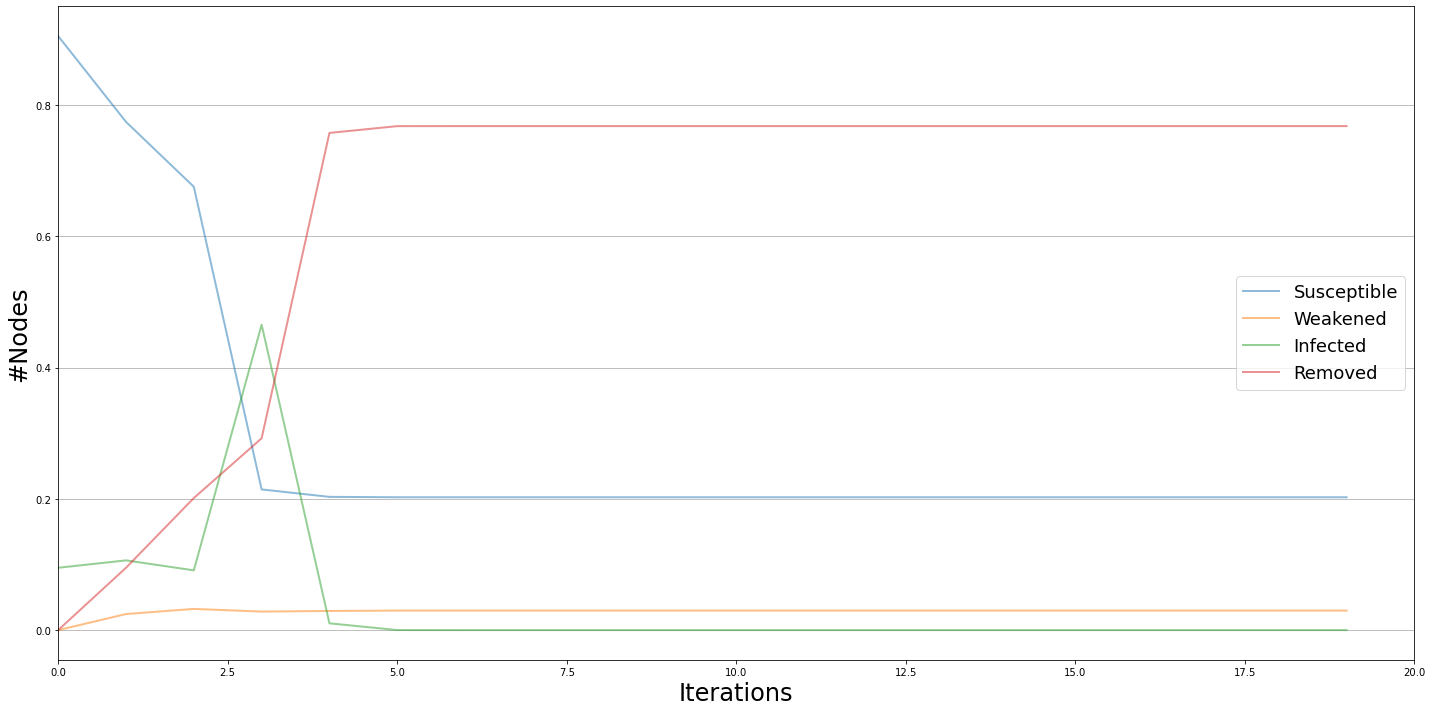

In [22]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [23]:
infected_nodes = list(g.neighbors(2))

In [24]:
len(infected_nodes)/g.number_of_nodes()

0.09275657769000446

In [29]:
model = ep.SWIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('kappa', 0.002) #treshold from S => I
cfg.add_model_parameter('mu', 0.03) #treshold from S => W
cfg.add_model_parameter('nu', 0.04) #treshold from W => I
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(20, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 20/20 [00:01<00:00, 10.81it/s]


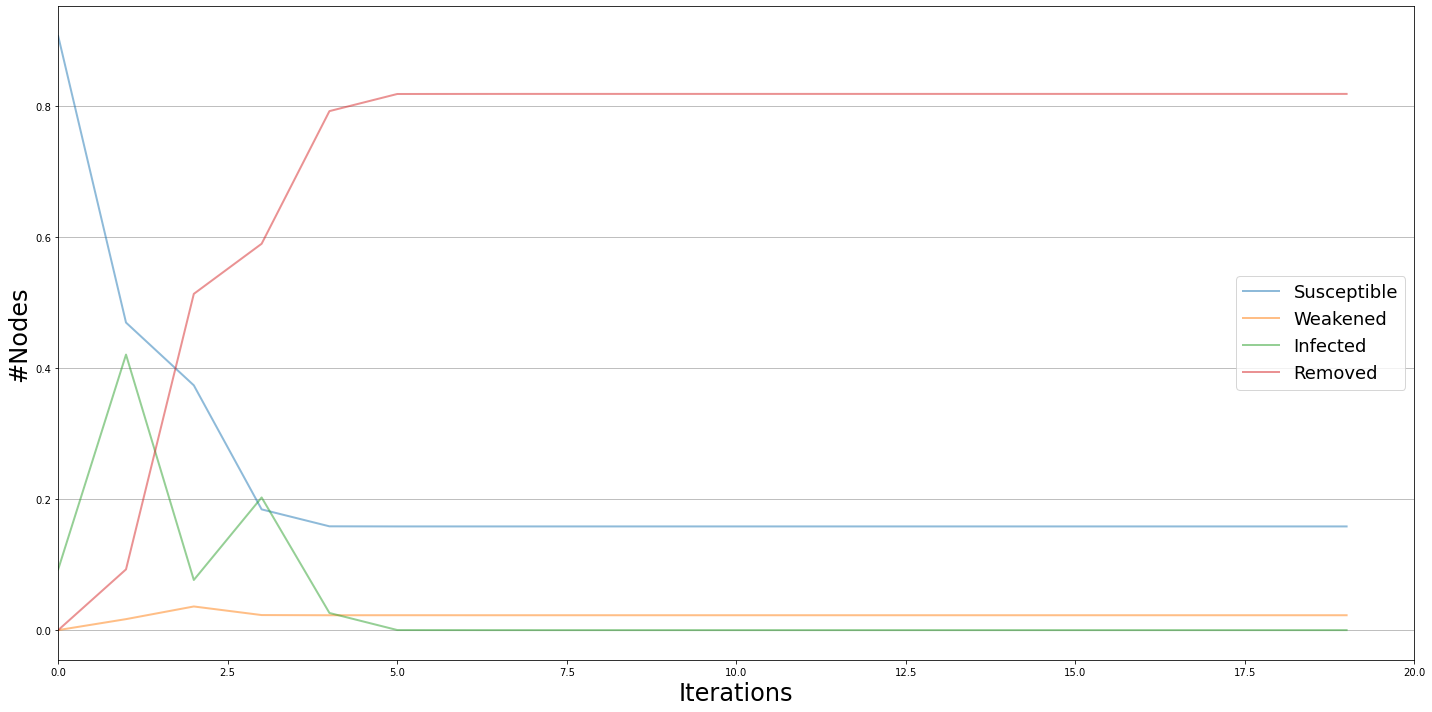

In [30]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [38]:
infected_nodes = set(list(g.neighbors(2))+list(g.neighbors(27)))

In [39]:
len(infected_nodes)/g.number_of_nodes()

0.10419188379945213

In [40]:
model = ep.SWIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('kappa', 0.002) #treshold from S => I
cfg.add_model_parameter('mu', 0.03) #treshold from S => W
cfg.add_model_parameter('nu', 0.04) #treshold from W => I
cfg.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(20, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 20/20 [00:01<00:00, 11.73it/s]


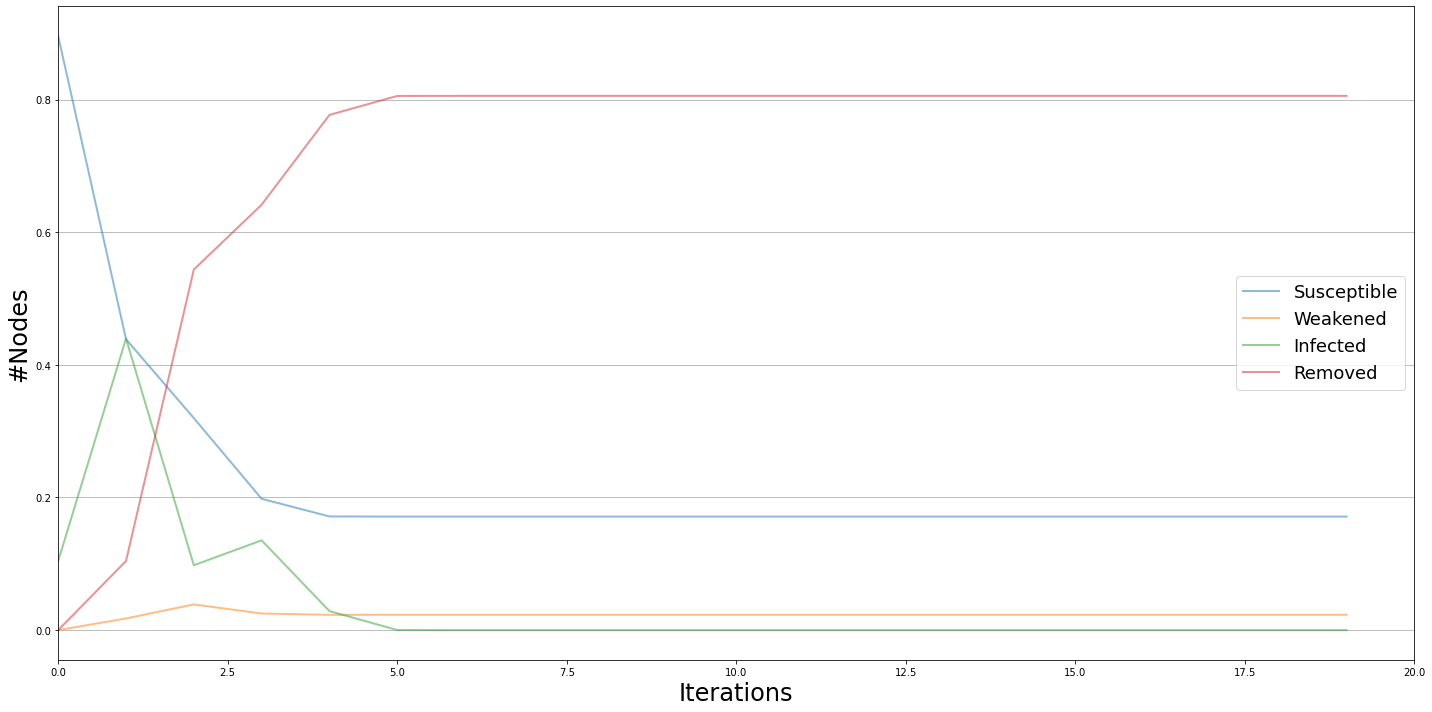

In [41]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

### Community discovery algorithm testing on node 2

In [45]:
mod_m = algorithms.mod_m(g, 2) #scegliere i nodi 

In [48]:
over='Communities overlap'
if mod_m.overlap == False:
    over='Communities don\'t overlap'    
print('INFORMATION:\n Algorithm used: {},\n Number of communites: {},\n {},\n Coverage: {}'.format(mod_m.method_name, len(mod_m.communities), over, mod_m.node_coverage))

INFORMATION:
 Algorithm used: mod_m,
 Number of communites: 1,
 Communities don't overlap,
 Coverage: 0.0453908390138243


In [47]:
for i in range (1,38):
    print(i, mod_m.to_node_community_map()[i])

1 []
2 [0]
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []


### Majority 
Agents take discrete opinions ±1, just like the Voter model. At each time step a group of r agents is selected randomly and they all take the majority opinion within the group. The group size can be fixed or taken at each time step from a specific distribution. If r is odd, then the majority opinion is always defined, however if r is even there could be tied situations. To select a prevailing opinion in this case, a bias in favour of one opinion (+1) is introduced. This idea is inspired by the concept of social inertia

In [83]:
infected_nodes = set( list(g.neighbors(4)) + list(g.neighbors(11)) + list(g.neighbors(3)) + list(g.neighbors(15)) + list(g.neighbors(2)) +list(g.neighbors(19)) + list(g.neighbors(27)) +list(g.neighbors(25)) +list(g.neighbors(36)))

In [94]:
len(infected_nodes)/g.number_of_nodes()

0.48738612473721094

In [49]:
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('q', 50)
#config.add_model_parameter('fraction_infected', 0.5)
config.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

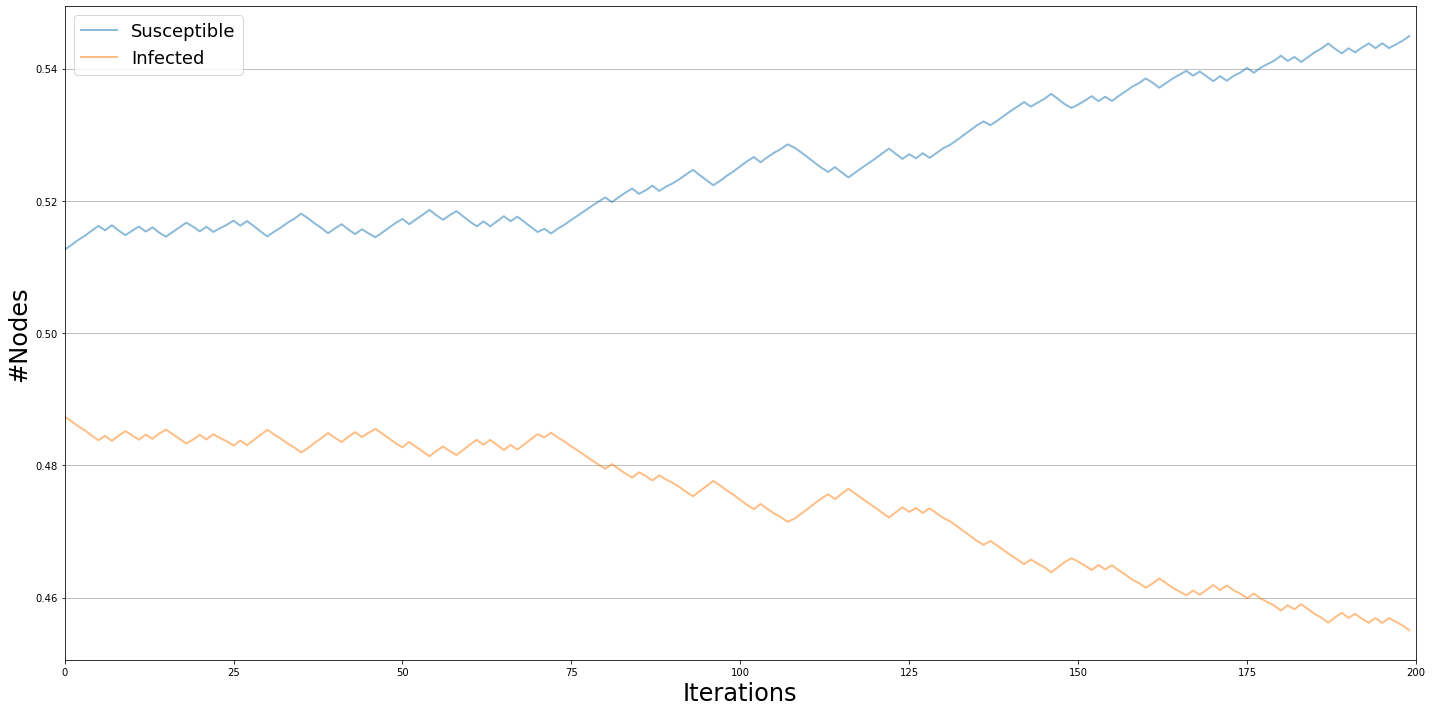

In [50]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [51]:
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.5)
#config.add_model_initial_configuration("Infected", infected_nodes)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

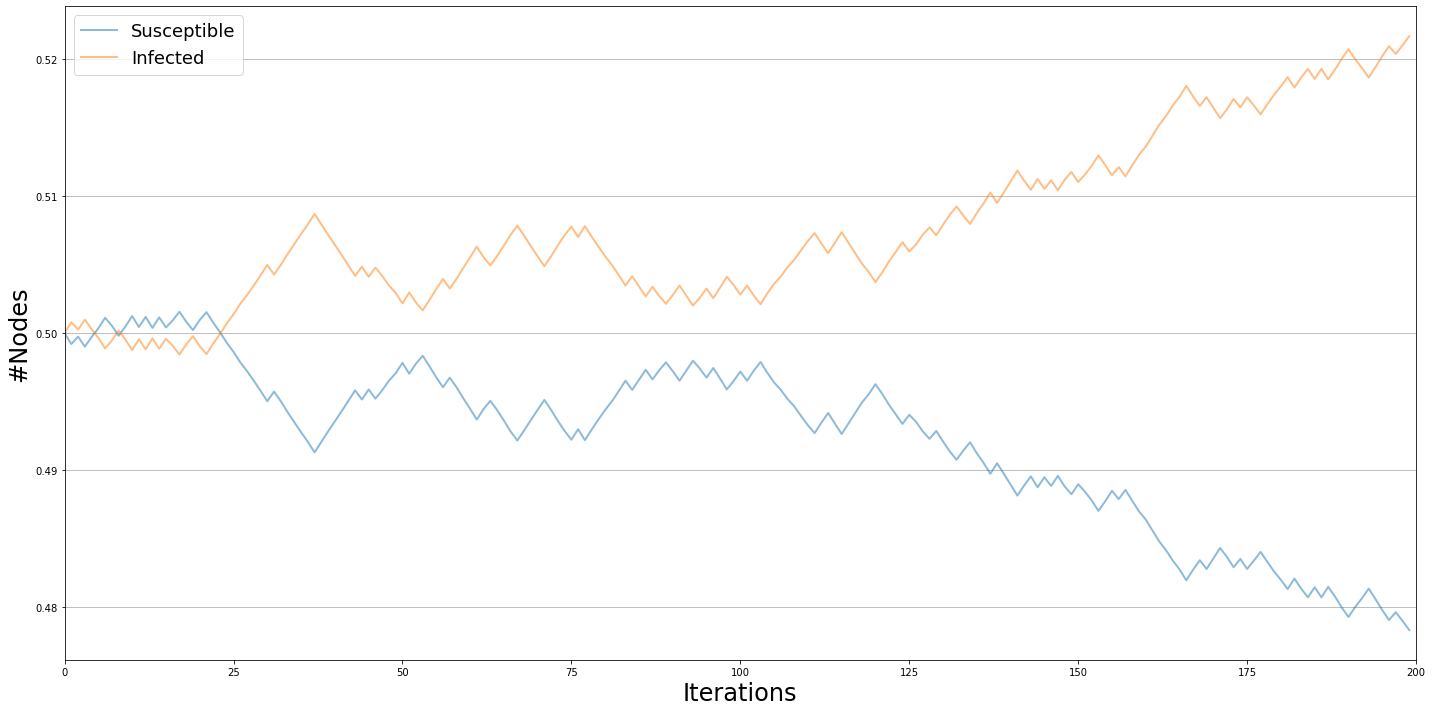

In [52]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

### Voter model
The model assumes the opinion of an individual to be a discrete variable ±1. The state of the population varies based on a very simple update rule: at each iteration, a random individual is selected, who then copies the opinion of one random neighbour.
Starting from any initial configuration, on a complete network the entire population converges to consensus on one of the two options. The probability that consensus is reached on opinion +1 is equal to the initial fraction of individuals holding that opinion

In [65]:
model = op.VoterModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(400)
trends = model.build_trends(iterations)

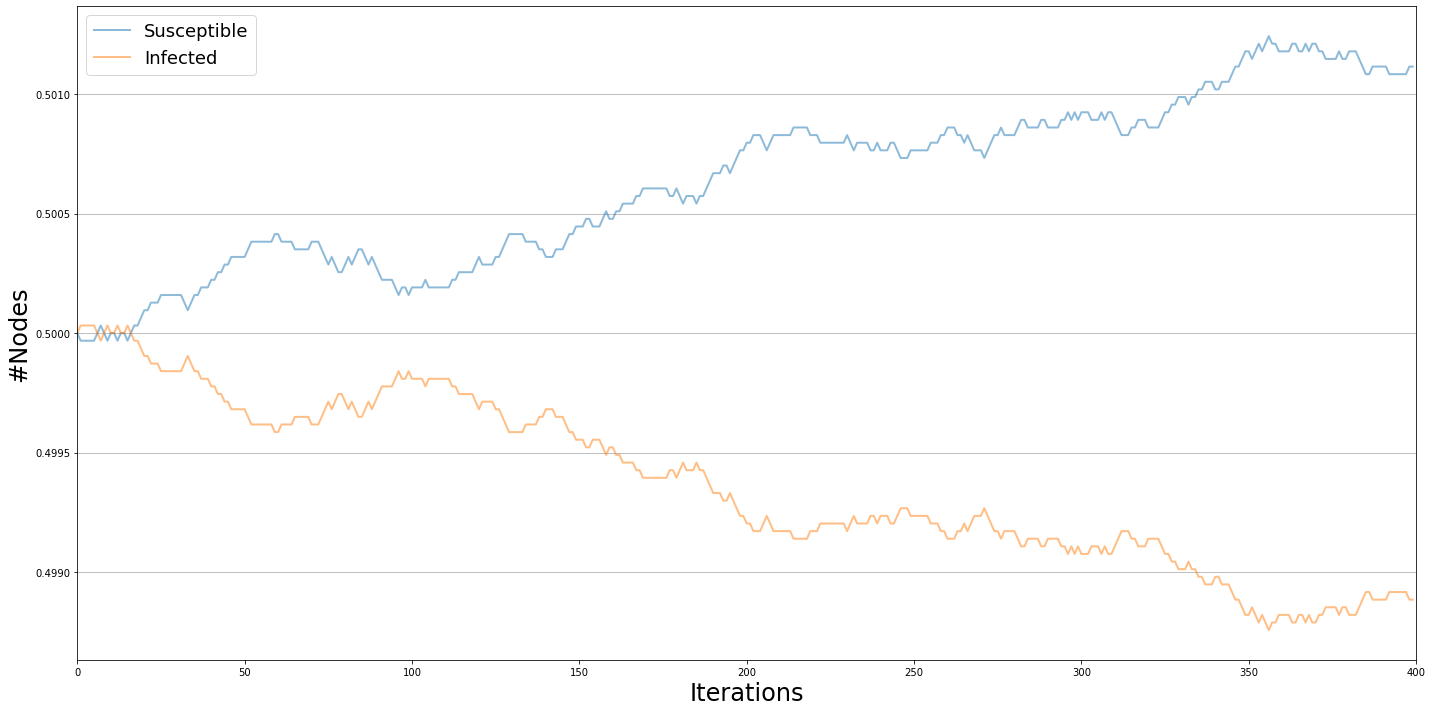

In [66]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

In [70]:
model = op.VoterModel(g)
config = mc.Configuration()
#infected_nodes = list(g.neighbors(4)) + list(g.neighbors(11)) + list(g.neighbors(3)) + list(g.neighbors(15)) + list(g.neighbors(2))
config.add_model_initial_configuration("Infected", infected_nodes)
#config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(20000, progress_bar=True)
trends = model.build_trends(iterations)

100%|██████████| 20000/20000 [02:39<00:00, 125.11it/s]


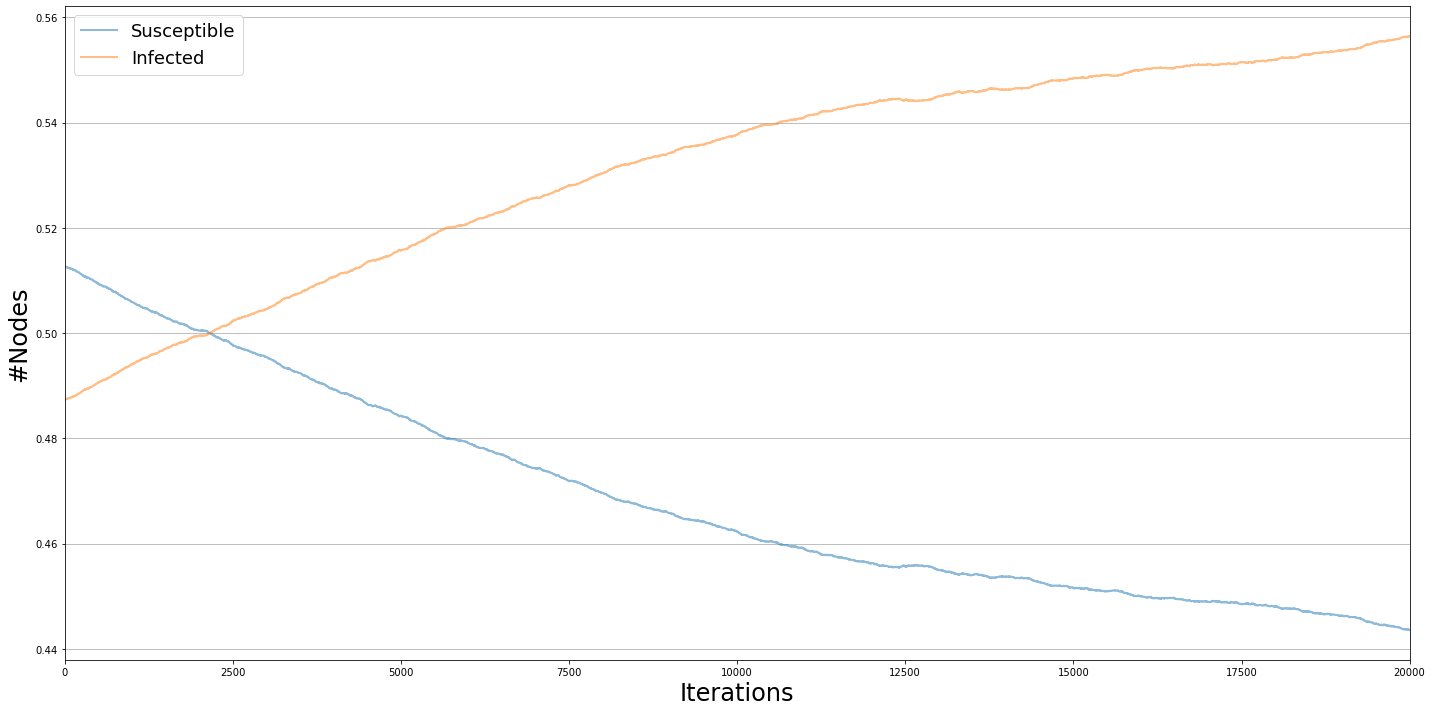

In [71]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

### Sznajd
In the original model the social network is a 2-dimensional lattice, however we also implemented the variant on any complex networks. Each agent has an opinion σi = ±1. At each time step, a pair of neighbouring agents is selected and, if their opinion coincides, all their neighbours take that opinion.

In [89]:
model_s = op.SznajdModel(g)
config = mc.Configuration()
#config.add_model_initial_configuration("Infected", infected_nodes)
config.add_model_parameter('fraction_infected', 0.5)

model_s.set_initial_status(config)

# Simulation execution
iterations = model_s.iteration_bunch(500)
trends = model_s.build_trends(iterations)

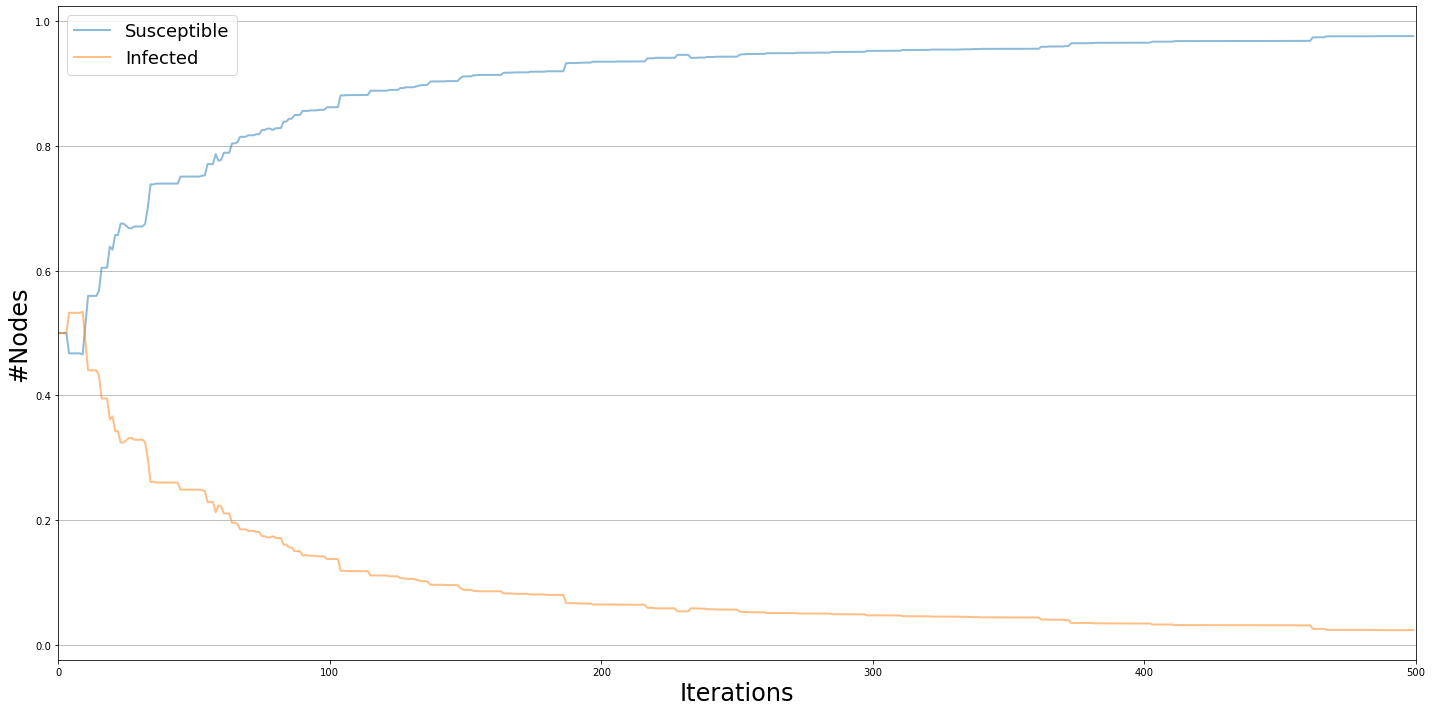

In [90]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model_s, trends)
viz.plot()

In [86]:
len(infected_nodes)

15301

In [101]:
model = op.SznajdModel(g)
config = mc.Configuration()
config.add_model_initial_configuration("Infected", infected_nodes)
#config.add_model_parameter('fraction_infected', 0.1)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

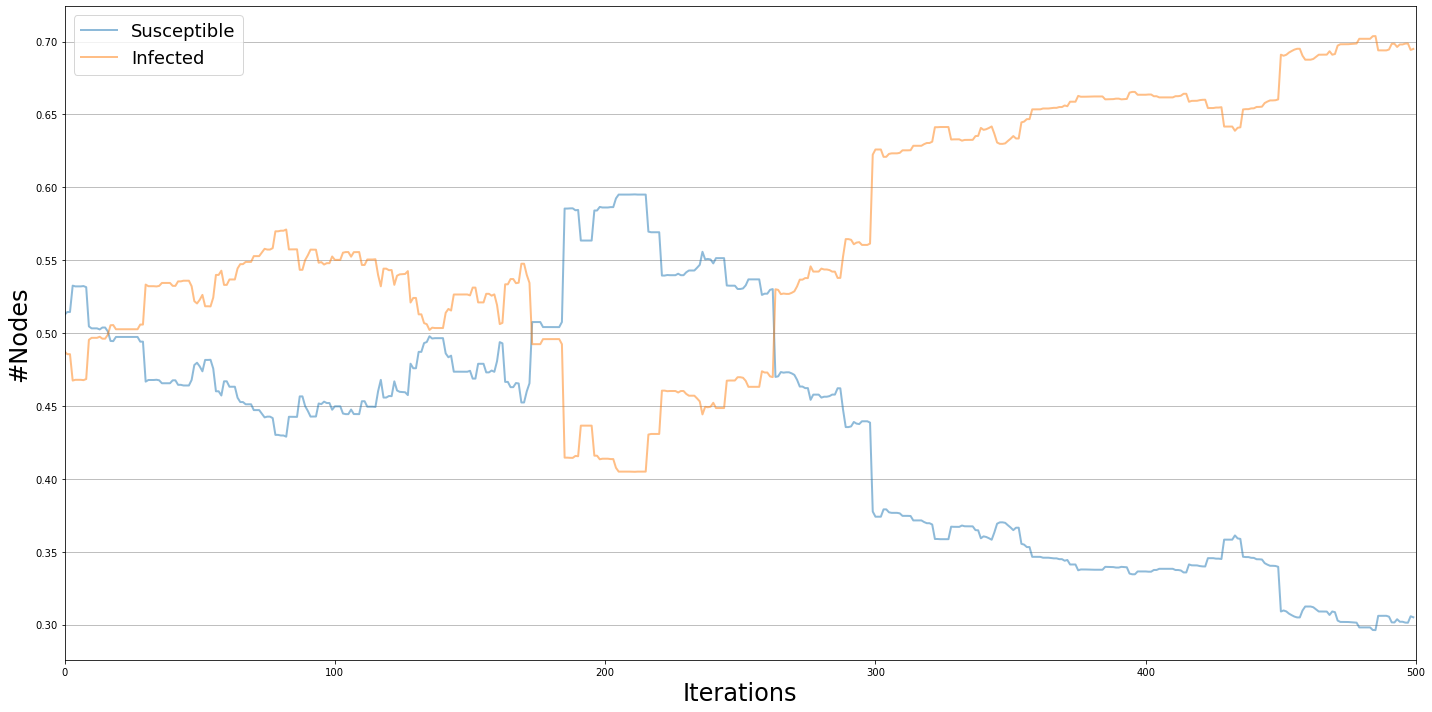

In [85]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()